<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cross-Validation</a></span></li><li><span><a href="#Using-KFolds" data-toc-modified-id="Using-KFolds-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using KFolds</a></span><ul class="toc-item"><li><span><a href="#Bias---Variance-Tradeoff" data-toc-modified-id="Bias---Variance-Tradeoff-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bias - Variance Tradeoff</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Hp/Documents/Flatiron/Phase 3/Flatiron_Phase_3/Notes/Statistical Learning Theory/student-mat.csv")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# changing categorical data into numerical data 

df_encoded = pd.get_dummies(df,drop_first=True)
print(df_encoded)

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  \
0        4     1  ...     

In [5]:
df = df_encoded
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [6]:
# define x and y 

x = df.drop("G3",axis=1)
y = df["G3"]

In [7]:
# split the data into training and testing 

from sklearn.model_selection import train_test_split

In [8]:
# This is basically what model validation is 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [9]:
# now we train the model 

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
model.coef_

array([-0.11592662,  0.08631677, -0.16737768,  0.08859282, -0.00774276,
       -0.28578115,  0.31496242, -0.02022574,  0.18985939, -0.18550918,
        0.05390572,  0.04402694,  0.05559269,  0.2116987 ,  0.95777208,
        0.09381411,  0.3744096 ,  0.08261237, -0.00877173, -0.14039393,
       -0.4632439 , -0.23719518, -0.0516432 ,  0.09915197,  0.4812421 ,
        0.20644054, -0.29476201, -0.06829101, -0.61190072,  0.30497262,
       -0.22169394,  0.09530352, -0.1492908 ,  0.78565167,  0.20365619,
        0.06722228, -0.51749961, -0.23686146,  0.3753768 , -0.16820426,
       -0.39035251])

In [11]:
model.intercept_

# this is the base value when you have a 0 and all the variables are constant. 

-1.9970238353909995

In [12]:
# Evaluate the model 

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np 

y_pred = model.predict(x_test)
mse = mean_squared_error (y_test,y_pred)
rsme = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print(mse)
print(rsme)
print(r2)

5.65664283323122
2.3783697847961363
0.7241341236974023


In [13]:
# check for over fitting 
r2_train = model.score(x_train, y_train)
r2_test = model.score(x_test,y_test)

In [14]:
print(r2_train)

0.8655977464052783


In [15]:
print(r2_test)

0.7241341236974023


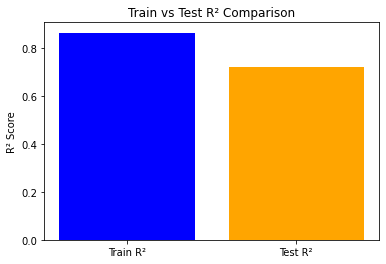

In [17]:
import matplotlib.pyplot as plt

labels = ['Train R²', 'Test R²']
scores = [r2_train, r2_test]

plt.bar(labels, scores, color=['blue', 'orange'])
plt.ylabel("R² Score")
plt.title("Train vs Test R² Comparison")
plt.show()

## Cross-Validation 
We test our model on even smaller subset of our data to see if it still performs well.

In [28]:
from sklearn.model_selection import cross_val_score, KFold 

cross_val_score(model,x_train,y_train,cv=5)

# DEfailt score is R^2

array([0.82263842, 0.85731278, 0.84727753, 0.81021576, 0.79418657])

In [29]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer

# cross_val_score(model, x_train, y_train, cv=10, scoring="neg_mean_squared_error")
cross_val_score(model, x_train, y_train, cv=10, scoring=make_scorer(mean_squared_error))

# DEfailt score is R^2

array([4.43188383, 4.45894445, 1.29484892, 3.32464003, 3.78684952,
       3.06085047, 3.49357183, 5.78720221, 3.11576128, 3.92658775])

## Using KFolds 
This is a cross validation object you create that allows you to specify how the data is folded. 

In [33]:
# create a KFold object 
folds = KFold(n_splits=10, shuffle=True, random_state=42)

cross_val_score(model, x_train, y_train, cv=folds)


array([0.83928841, 0.80510185, 0.7717791 , 0.82033028, 0.64953931,
       0.8660007 , 0.88342242, 0.83607529, 0.74501594, 0.85140042])

In [35]:
# check how the data was split 
for fold in folds.split(x_train):
    train_indices, test_indices = fold
    print(f"Train indices:{train_indices}")
    

Train indices:[  0   1   2   3   4   6   7   8  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  26  27  28  29  30  31  32  34  35  36  37  38  39
  40  41  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  61  62  64  65  66  67  68  69  70  71  72  73  74  75  77  79  80
  81  83  84  85  86  87  88  89  90  91  92  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 138
 140 141 142 143 144 145 147 148 149 150 151 152 153 154 155 156 157 159
 160 161 162 164 166 167 169 170 171 172 174 175 176 177 178 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 196 197 198 199 200 201 202
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 263 264 266 267 268 269 270 

### Bias - Variance Tradeoff 

* Model Complexity: How well a model is able to explain the underlying features in a training dataset
* Bias: High bias means a model is not able to make correct predictions and is underfitted =. 
* Variance: High variance means the model captures noise and is overfitted. 
* Underfitting: High Bias, Low variance 
* Overfitting: Low Bias, High variance 
* Optimum: Ideal

In [ ]:
from sklearn.model_selection import cross_val_predict
